In [2]:
import polars as pl

DATA_PATH = '../data/'

In [3]:
%config IPCompleter.use_jedi = False
%config Completer.evaluation = 'limited'

In [4]:
df = pl.read_csv(DATA_PATH + 'placements.csv')

df.describe()


statistic,post_id,publication_id,campaign_id,approved_clicks,approved_opens,post_send_at
str,str,str,str,f64,f64,str
"""count""","""275081""","""275081""","""275081""",275081.0,275081.0,"""275003"""
"""null_count""","""0""","""0""","""0""",0.0,0.0,"""78"""
"""mean""",null,null,null,18.568931,8368.335665,null
"""std""",null,null,null,50.308067,25581.771293,null
"""min""","""0000208f-5731-42e2-85a0-561fa1…","""000bbfbd-7e56-4311-8a34-55e2d1…","""0038cdc4-cc62-4846-9691-cc809c…",0.0,0.0,"""2023-09-14 03:00:01.839"""
"""25%""",null,null,null,2.0,296.0,null
"""50%""",null,null,null,6.0,1671.0,null
"""75%""",null,null,null,17.0,6572.0,null
"""max""","""fffff872-c760-4752-b983-87a13e…","""fffc4dd6-f0a1-4522-973b-4fd09a…","""ffe091e0-dfcf-4b54-a9f8-d79334…",3355.0,706281.0,"""2025-12-12 16:00:35.871"""


In [8]:
df['approved_clicks'].hist()


breakpoint,category,count
f64,cat,u32
335.5,"""[0.0, 335.5]""",274029
671.0,"""(335.5, 671.0]""",831
1006.5,"""(671.0, 1006.5]""",152
1342.0,"""(1006.5, 1342.0]""",40
1677.5,"""(1342.0, 1677.5]""",12
2013.0,"""(1677.5, 2013.0]""",7
2348.5,"""(2013.0, 2348.5]""",0
2684.0,"""(2348.5, 2684.0]""",7
3019.5,"""(2684.0, 3019.5]""",2


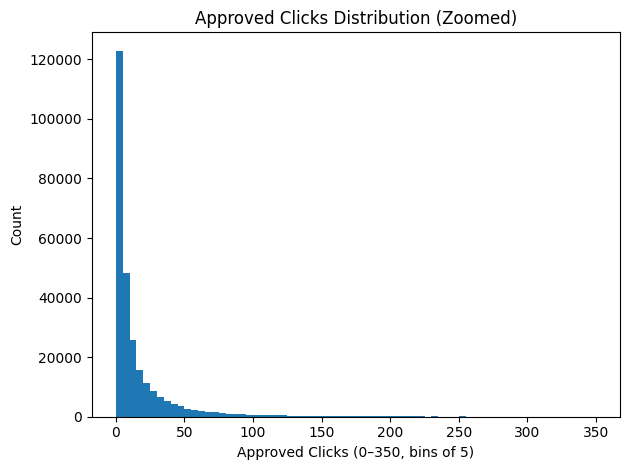

In [11]:
import numpy as np
import matplotlib.pyplot as plt

upper_cap = 350

filtered_clicks = (
    df
    .filter(pl.col("approved_clicks") <= upper_cap)
    .select("approved_clicks")
    .to_numpy()
    .ravel()
)

bins = np.arange(0, upper_cap + 5, 5)

plt.figure()
plt.hist(filtered_clicks, bins=bins)
plt.xlabel("Approved Clicks (0–350, bins of 5)")
plt.ylabel("Count")
plt.title("Approved Clicks Distribution")
plt.tight_layout()
plt.show()

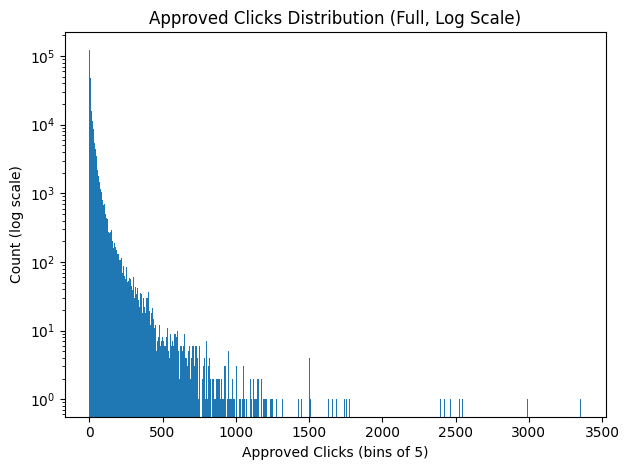

In [12]:
clicks = (
    df
    .select("approved_clicks")
    .to_numpy()
    .ravel()
)

bins = np.arange(
    clicks.min(),
    clicks.max() + 5,
    5
)

plt.figure()
plt.hist(clicks, bins=bins)
plt.yscale("log")
plt.xlabel("Approved Clicks (bins of 5)")
plt.ylabel("Count (log scale)")
plt.title("Approved Clicks Distribution (Full, Log Scale)")
plt.tight_layout()
plt.show()


In [ ]:
#  compute ctr
df = df.with_columns(
    pl.when(pl.col("approved_opens") > 0)
      .then(pl.col("approved_clicks") / pl.col("approved_opens"))
      .otherwise(None)
      .alias("ctr")
)

In [29]:

amount_too_high = df.filter((pl.col('ctr') > 1)).count()
amount_null = df.filter(pl.col('ctr').is_null()).count()
amount_total = df.count()

print(f"Amount too high: {amount_too_high}")
print(f"Amount null: {amount_null}")
print(f"Amount total: {amount_total}")


Amount too high: shape: (1, 8)
┌─────────┬──────────────┬─────────────┬──────────────┬─────────────┬─────────────┬─────┬──────────┐
│ post_id ┆ publication_ ┆ campaign_id ┆ approved_cli ┆ approved_op ┆ post_send_a ┆ ctr ┆ ctr_gt_1 │
│ ---     ┆ id           ┆ ---         ┆ cks          ┆ ens         ┆ t           ┆ --- ┆ ---      │
│ u32     ┆ ---          ┆ u32         ┆ ---          ┆ ---         ┆ ---         ┆ u32 ┆ u32      │
│         ┆ u32          ┆             ┆ u32          ┆ u32         ┆ u32         ┆     ┆          │
╞═════════╪══════════════╪═════════════╪══════════════╪═════════════╪═════════════╪═════╪══════════╡
│ 442     ┆ 442          ┆ 442         ┆ 442          ┆ 442         ┆ 442         ┆ 442 ┆ 442      │
└─────────┴──────────────┴─────────────┴──────────────┴─────────────┴─────────────┴─────┴──────────┘
Amount null: shape: (1, 8)
┌─────────┬──────────────┬─────────────┬──────────────┬─────────────┬─────────────┬─────┬──────────┐
│ post_id ┆ publication_ ┆ campai

In [ ]:
# we now have a column which represents the ctr and is capped as 1 (we assume a max ctr of 1 as meaning the all opens ended up in clicks)
# this only applies to 422 of the total count which is negligible.
df = df.with_columns(
    pl.when(pl.col("ctr") > 1)
      .then(1)
      .otherwise(0)
      .alias("ctr_gt_1")
)

In [36]:
import duckdb

placements = duckdb.read_csv(DATA_PATH + 'placements.csv')
campaigns = duckdb.read_csv(DATA_PATH + 'campaigns.csv')
advertisers = duckdb.read_csv(DATA_PATH + 'advertisers.csv')

duckdb.sql(
    """
    SELECT * 
    FROM placements 
        join campaigns on placements.campaign_id = campaigns.campaign_id 
        join advertisers on campaigns.advertiser_id = advertisers.advertiser_id 
    LIMIT 10
    """
)




┌──────────────────────────────────────┬──────────────────────────────────────┬──────────────────────────────────────┬─────────────────┬────────────────┬─────────────────────────┬──────────────────────────────────────┬──────────────────────────────────────┬──────────────────────────────────────────────────────────────┬───────────────┬───────────────────────────────────────────────────┬───────────────────────────────────────┬───────────────┬──────────────────────────────────────┬──────────────────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬────────────────────────────┐
│               post_id                │            publication_id            │             campaign_id  